## Great Circle Calculation

Overview:
- [x] [gc_onarc](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_onarc.shtml):  Determines if a point on the globe lies on a specified great circle arc (uxarray)
- [x] [gc_latlon](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_latlon.shtml): Finds the great circle distance (true surface distance) between two points on the globe and interpolates points along the great circle (geopy and pyproj)
- [ ] [gc_aangle](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_aangle.shtml):  Finds the acute angle between two great circles on the globe. 
- [ ] [gc_pnt2gc](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_pnt2gc.shtml):  Finds the angular distance from a point to a great circle. 
- [ ] [gc_dangle](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_dangle.shtml):  Finds the directed angle between two great circles having a specified intersection point. 
- [ ] [gc_clkwise](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_clkwise.shtml):  Tests clockwise/counterclockwise ordering of points on spherical polygon. 
- [ ] [gc_inout](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_inout.shtml):  Determines if a list of lat/lon specified points are inside or outside of spherical lat/lon polygon(s). 
- [ ] [gc_qarea](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_qarea.shtml):  Finds the area of a quadrilateral patch on the unit sphere. 
- [ ] [gc_tarea](https://www.ncl.ucar.edu/Document/Functions/Built-in/gc_tarea.shtml):  Finds the area of a triangular patch on the unit sphere. 

In [116]:
import numpy as np

In [117]:
earth_radius = 6378137  # meters

# Based on WSG-84: https://gscommunitycodes.usf.edu/geoscicommunitycodes/public/geophysics/Gravity/earth_shape.php

## Cartesian Coordinates

Cartesian coordinates describe points in space based on perpendicular axis lines that meet at a singlle point of orign, where any point's position is described based on the distance to the orgin along xyz axis

## Spherical Coordinates

Spherical coordinates describe points in space based on three values: radial distance (rho, r) along the radial line between point and the origin, polar angle (theta, θ) between the radial line and the polar axis, and azimuth angle (phi, φ) which is the angle of rotation of the radial line around the polar axis. With a fixed radius, the 3-point coordinates (r, θ, φ) provide a coordiante along a sphere

- Radial distance: distance from center to surface of sphere
- Polar angle: angle between radial line and polar axis
- Azimuth angle: angle around polar axis

<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/82/Sphericalcoordinates.svg/1024px-Sphericalcoordinates.svg.png" alt="Spherical Coordinate Description from Wikipedia" width=400 />
</p>

In [118]:
def latlon_to_cartesian_coords(latitude=None, longitude=None, radius=None):
    cart_x = radius * np.cos(latitude) * np.cos(longitude)
    cart_y = radius * np.cos(latitude) * np.sin(longitude)
    cart_z = radius * np.sin(latitude)
    return cart_x, cart_y, cart_z

In [119]:
# https://math.libretexts.org/Courses/Mount_Royal_University/MATH_2200%3A_Calculus_for_Scientists_II/7%3A_Vector_Spaces/5.7%3A_Cylindrical_and_Spherical_Coordinates
def cartestian_to_spherical(cart_x, cart_y, cart_z):
    # Convert from rectangular coordinates to spherical coordinates
    rho = np.sqrt(cart_x**2 + cart_y**2 + cart_z**2)
    theta = np.arctan(cart_y/cart_x)
    phi = np.arccos(cart_z / rho)
    return rho, theta, phi    

https://www.nosco.ch/mathematics/en/great-circle.php

In [120]:
## Return spherical and cartesian coordiantes dictionary for a new point
def return_all_coords(latitude=None, longitude=None):
    new_coords_dict = {"latitude": latitude, "longitude": longitude}
    cart_x, cart_y, cart_z = latlon_to_cartesian_coords(latitude, longitude, earth_radius)
    new_coords_dict["cart_x"] = cart_x
    new_coords_dict["cart_y"] = cart_y
    new_coords_dict["cart_z"] = cart_z
    rho, theta, phi = cartestian_to_spherical(new_coords_dict["cart_x"], new_coords_dict["cart_y"], new_coords_dict["cart_z"])
    new_coords_dict["rho"] = rho
    new_coords_dict["theta"] = theta
    new_coords_dict["phi"] = phi
    return new_coords_dict

In [121]:
# Two Points to Create Arc from Boulder -> Boston
boulder_lat = 40.0150
boulder_lon = -105.2705
boston_lat = 42.3601
boston_lon = -71.0589

boulder_coords = return_all_coords(boulder_lat, boulder_lon)
boston_coords = return_all_coords(boston_lat, boston_lon)

## gc_onarc: Determines if a point on the globe lies on a specified great circle arc

In [122]:
# pip install uxarray
# pip install shapely
# pip install Pillow
# pip install pyparsing
# pip install kiwisolver
# pip install dask
# python -m pip install "dask[dataframe]"
# pip install fsspec
import uxarray as ux

``
uxarray.grid.arcs.point_within_gca(pt, gca_cart, is_directed=False)
``
- pt (numpy.ndarray (float)) – Cartesian coordinates of the point
- gca_cart (numpy.ndarray of shape (2, 3), (np.float or gmpy2.mpfr)) – Cartesian coordinates of the Great Circle Arc (GCR).

### Great Circle Arc

In [123]:
# Great Circle Arc formed by cartesian coordinates of two points (Boulder -> Boston)
boulder_point = np.array([boulder_coords["cart_x"], boulder_coords["cart_y"], boulder_coords["cart_z"]])
boston_point = np.array([boulder_coords["cart_x"], boulder_coords["cart_y"], boulder_coords["cart_z"]])

great_circle_arc = np.array([boulder_point, boston_point])
print(great_circle_arc.shape)
great_circle_arc

(2, 3)


array([[ -117382.37626   , -4323034.28076309,  4688094.23709248],
       [ -117382.37626   , -4323034.28076309,  4688094.23709248]])

### Point along the great circle arc from Boulder to Boston: Cloverdale
Arc determined via [great circle map](https://www.greatcirclemap.com/roadmap?routes=DEN-BOS) between DIA and Logan Airport

In [124]:
# Point along the great circle arc: Cloverdale
cloverdale_lat = 38.8055
cloverdale_lon = -123.0172
cloverdale_coords = return_all_coords(cloverdale_lat, cloverdale_lon)
point_on_arc = np.array([cloverdale_coords["cart_x"], cloverdale_coords["cart_y"], cloverdale_coords["cart_z"]])
point_on_arc

array([-2513713.48229094,  1357253.48920046,  5702608.09505361])

In [125]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc)
print(f"Does the point lie on the great circle = {does_point_lie_on_arc}")

Does the point lie on the great circle = True


### Point NOT along the great circle arc from Boulder to Boston: Wichita  

### Point NOT along the great circle arc: Wichita
wichita_lat = 37.6872
wichita_lon = -97.3301
wichita_coords = return_all_coords(wichita_lat, wichita_lon)
point_on_arc = np.array([wichita_coords["cart_x"], wichita_coords["cart_y"], wichita_coords["cart_z"]])
point_on_arc

In [126]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc)
print(f"Does the point lie on the great circle = {does_point_lie_on_arc}")

Does the point lie on the great circle = True


### Point ALMOST along the great circle arc from Boulder to Boston: Omaha   

In [127]:
# Point NOT along the great circle arc: Omaha
omaha_lat = 37.6872
omaha_lon = -97.3301
omaha_coords = return_all_coords(omaha_lat, omaha_lon)
point_on_arc = np.array([omaha_coords["cart_x"], omaha_coords["cart_y"], omaha_coords["cart_z"]])
point_on_arc

array([-6366484.73786982,  -377798.47782279,   -75973.57036748])

In [128]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc)
print(f"Does the point lie on the great circle = {does_point_lie_on_arc}")

Does the point lie on the great circle = False


### Point along the great circle arc from (Reversed) Boulder to Boston: Basalt

In [129]:
# Point along the reversed great circle arc: Basalt
basalt_lat = 39.3725
basalt_lon = -107.0785
basalt_coords = return_all_coords(basalt_lat, basalt_lon)
point_on_arc = np.array([basalt_coords["cart_x"], basalt_coords["cart_y"], basalt_coords["cart_z"]])
point_on_arc

array([-630507.12680923,  170668.54897069, 6344601.21679874])

In [130]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc, is_directed=False)
print(f"Does the point lie on the great circle (directed) = {does_point_lie_on_arc}")

Does the point lie on the great circle (directed) = True


In [131]:
does_point_lie_on_arc = ux.grid.arcs.point_within_gca(point_on_arc, great_circle_arc, is_directed=True)
print(f"Does the point lie on the great circle (undirected) = {does_point_lie_on_arc}")

Does the point lie on the great circle (undirected) = True


## gc_latlon: Finds the great circle distance (true surface distance) between two points on the globe and interpolates points along the great circle. 

In [132]:
from pyproj import Geod
geodesic = Geod(ellps="WGS84")

In [133]:
foward_bearing, reverse_bearing, distance_meter =  geodesic.inv(boulder_coords["longitude"],
                                                    boulder_coords["latitude"],
                                                    boston_coords["longitude"],
                                                    boston_coords["latitude"])

In [134]:
print(f"Distance between coordinates = {distance_meter/1000} km")

Distance between coordinates = 2862.597479914522 km


### Foward Bearing: direction towards the next point

### Two version: 
- interpolate with N total equally spaced number of points
- interpolate every N meters

In [135]:
import geopy.distance

def interpolate_points_along_gc(lat_start,
                                lon_start,
                                lat_end,
                                lon_end,
                                distance_between_points_meter): 
    lat_lon_points = []
    
    # move to next point when distance between points is less than the equal distance
    move_to_next_point = True
    while(move_to_next_point):
        forward_bearing, reverse_bearing, distance_meters = geodesic.inv(lon_start,
                                                                         lat_start, 
                                                                         lon_end,
                                                                         lat_end)
        if distance_meters < distance_between_points_meter:
            # ends before overshooting
            move_to_next_point = False
        else:
            start_point = geopy.Point(lat_start, lon_start)
            distance_to_move = geopy.distance.distance(
                            kilometers=distance_between_points_meter /
                            1000)  # distance to move towards the next point
            final_position = distance_to_move.destination(
                            start_point, bearing=forward_bearing)
            lat_lon_points.append((final_position.latitude, final_position.longitude))
            # new starting position is newly found end position
            lon_start, lat_start = final_position.longitude, final_position.latitude
    
    return lat_lon_points

### 1.) Interpolate with _N_ Total Equally Spaced Points

In [136]:
n_total_points = 10 # total points (n points)

distance_between_points_meter = distance_meter / (n_total_points + 1)
print(f"Each point will be seperated by {distance_between_points_meter} meters ({distance_between_points_meter/1000} km)")

Each point will be seperated by 260236.1345376838 meters (260.2361345376838 km)


In [137]:
lat_start, lon_start = boulder_coords["latitude"], boulder_coords["longitude"]
lat_end, lon_end = boston_coords["latitude"], boston_coords["longitude"]

every_n_pts = interpolate_points_along_gc(lat_start,
                                          lon_start,
                                          lat_end,
                                          lon_end,
                                          distance_between_points_meter)
print(f"{len(every_n_pts)} Total Points")
every_n_pts

10 Total Points


[(40.64283438472448, -102.32002071588883),
 (41.19386139956729, -99.31719425393653),
 (41.665293789240074, -96.2672998277903),
 (42.054648659580415, -93.17653047007545),
 (42.35980367525436, -90.05192021556941),
 (42.57904824130258, -86.90123344627509),
 (42.711126897374584, -83.73281874084785),
 (42.75527239726805, -80.55543262504408),
 (42.71122644219359, -77.37804142647052),
 (42.57924674954763, -74.20961159223958)]

### 2.) Interpolate every N meters

In [138]:
distance_between_points_meter = 112351
print(f"Each point will be seperated by {distance_between_points_meter} meters ({distance_between_points_meter/1000} km)")

Each point will be seperated by 112351 meters (112.351 km)


In [139]:
lat_start, lon_start = boulder_coords["latitude"], boulder_coords["longitude"]
lat_end, lon_end = boston_coords["latitude"], boston_coords["longitude"]

every_n_meters_pts = interpolate_points_along_gc(lat_start,
                                          lon_start,
                                          lat_end,
                                          lon_end,
                                          distance_between_points_meter)
print(f"{len(every_n_meters_pts)} Total Points")
every_n_meters_pts

25 Total Points


[(40.29528549842406, -104.00341905484422),
 (40.561568665751025, -102.72608862554382),
 (40.81360756969855, -101.43886851868436),
 (41.05116853963942, -100.14215175538928),
 (41.274027051903765, -98.83636427179823),
 (41.481968612808345, -97.52196438787591),
 (41.67478963217906, -96.19944203574401),
 (41.85229827978712, -94.86931774153358),
 (42.01431531687306, -93.53214135788726),
 (42.16067489479776, -92.1884905476517),
 (42.291225312847395, -90.8389690229252),
 (42.40582972733871, -89.48420454739188),
 (42.50436680442648, -88.12484671369435),
 (42.58673130941052, -86.76156451138083),
 (42.652834625871606, -85.39504370461206),
 (42.702605198629755, -84.02598404223001),
 (42.735988895304544, -82.65509632587766),
 (42.75294928215213, -81.28309936452901),
 (42.75346781084072, -79.91071684595877),
 (42.73754391388529, -78.53867415728898),
 (42.70519500757115, -77.16769518774228),
 (42.65645640233027, -75.79849914708072),
 (42.591381121670025, -74.43179743290122),
 (42.51003963186467, -73

### Plot N Total Points and Set Distance Apart

In [140]:
import matplotlib.pyplot as plt
from cartopy import crs as ccrs, feature as cfeature

In [172]:
def plot_coordinate(lst_of_coords=None, title=None):
    #plt.style.use('dark_background')
    # Set up world map plot
    fig = plt.subplots(figsize=(15, 10))
    projection_map = ccrs.PlateCarree()
    ax = plt.axes(projection=projection_map)
    lon_west, lon_east, lat_south, lat_north = -130, -60, 20, 60
    ax.set_extent([lon_west, lon_east, lat_south, lat_north], crs=projection_map)
    ax.coastlines(color="black")
    ax.add_feature(cfeature.STATES, edgecolor="black")
    
    # Plot Latitude/Longitude Location
    longitudes = [x[1] for x in lst_of_coords] # longitude
    latitudes = [x[0] for x in lst_of_coords] # latitude
    plt.plot(longitudes, latitudes)
    plt.scatter(longitudes, latitudes)
    
    # Setup Axis Limits and Title/Labels
    plt.title(title)
    plt.xlabel("Longitude (Degrees)")
    plt.ylabel("Latitude (Degrees)")
    plt.show()

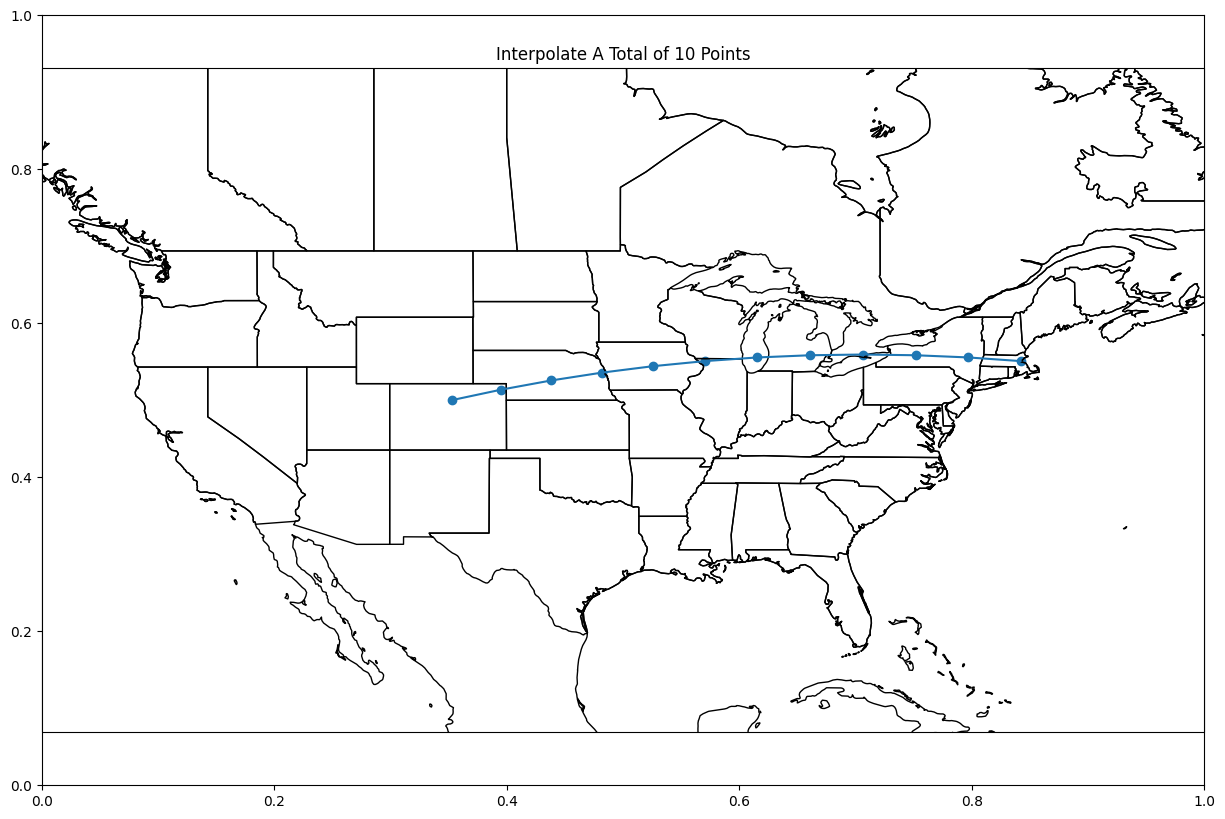

In [173]:
every_n_with_start_end = [(boulder_coords["latitude"], boulder_coords["longitude"])] + every_n_pts + [(boston_coords["latitude"],boston_coords["longitude"])]
plot_coordinate(every_n_with_start_end, f"Interpolate A Total of {n_total_points} Points")

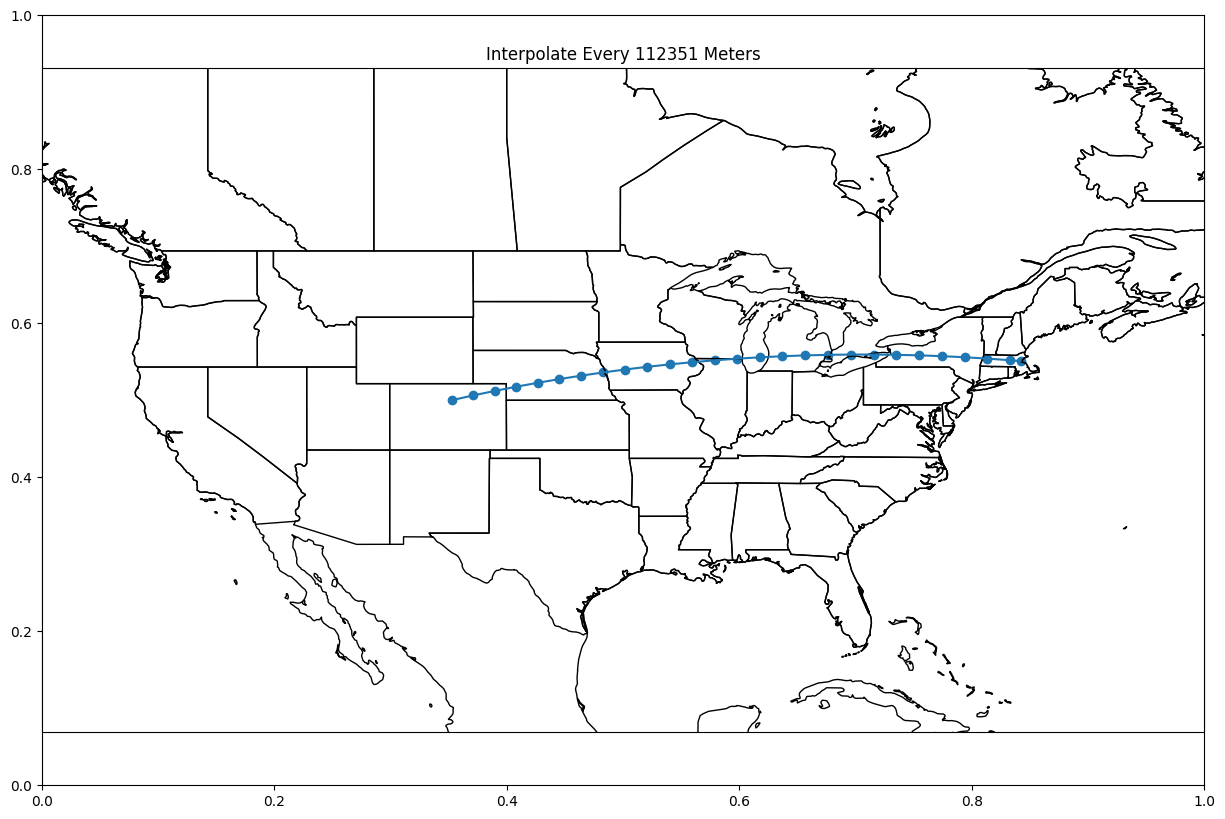

In [174]:
every_n_meters_with_start_end = [(boulder_coords["latitude"], boulder_coords["longitude"])] + every_n_meters_pts + [(boston_coords["latitude"],boston_coords["longitude"])]
plot_coordinate(every_n_meters_with_start_end, f"Interpolate Every {distance_between_points_meter} Meters")

> A great circle is a section of a sphere that contains a diamter of the sphere...A great circle becomes a straight line in a gnomoni c projection
> To find the great circle (geodesic) distance between two points located at latitude `delta` and longitude `lambda` of (delta_1, lamba_1) and (delta_2, lambda_2) on a sphere of radius a

[Wolfram MathWorld](https://mathworld.wolfram.com/GreatCircle.html)

1. Convert spherical coordinates to Cartesian coordinates using:

```
        | cos(lambda_i) * cos(delta_i) |
r_i = a | sin(lambda_i) * cos(delta_i) |
        |        sin(delta_i)          |
```
2. Find the angle `alpha` between r1 and r2 using the dot product
```
cos(alpha) = r_1_hat * r_2_hat
cos(alpha) = cos(delta_1) * cos(delta_2) * cos(lambda_1 - lambda_2) + sin(delta_1) * sin(delta_2)
```
3. The great circle distance is then: where a = 6378 km
```
d = a * cos^-1[cos(delta_1) * cos(delta_2) * cos(lambda_1 - lambda_2) + sin(delta_1) * sin(delta_2)]
```

In [144]:
from pyproj import Geod
geodesic = Geod(ellps="WGS84")

## gc_aangle

This function finds the acute angle between two great circles, given two pairs of points on the globe that define two arcs. 

### Input:
Latitudes and longitudes, in degrees, of vertices. The first two pairs of lat/lon values specify vertices of an arc of one great circle and the second two pairs specify the vertices of the second circle. These can be multi-dimensional arrays, but the rightmost dimension size must be 4 for specifying the vertices of the two arcs. If lat and lon have more than one dimension, then they must agree in number of dimensions and dimension sizes.
Return value
### Output
The acute angle, in degrees, between the great circles defined by the arcs as describe above. This will be a non-negative value. If the input arrays are singly dimensioned, then the return value will be a scalar. If the input arrays are multi-dimensional, then the returned array will have one less dimension than the number of dimensions of the input arrays and the dimension sizes of the returned array will agree with those of the input arrays up through their penultimate dimension. The return value will be of type double if either of the input arguments is of type double and type float otherwise.

In [145]:
aangle = ((0.0,  0.0, 0.0,  10.0), (0.0, 10.0, 0.0,   0.0))
arc_1_start  = (aangle[0][0], aangle[1][0])
arc_1_end    = (aangle[0][1], aangle[1][1])
arc_2_start  = (aangle[0][2], aangle[1][2])
arc_2_end    = (aangle[0][3], aangle[1][3])

print(arc_1_start) # (lat, lon)
print(arc_1_end)   # (lat, lon)

print(arc_2_end)   # (lat, lon)
print(arc_2_start) # (lat, lon)

#fwd_bearing, rvs_bearing, distance_m = geodesic.inv(lon_start, lat_start, lon_end, lat_end)
fwd_bearing, rvs_bearing, distance_m = geodesic.inv(arc_1_start[1],
                                                    arc_1_start[0],
                                                    arc_1_end[1],
                                                    arc_1_end[0])
print(f"forward bearing = {fwd_bearing} degrees")
print(f"reverse bearing = {rvs_bearing} degrees")
print(f"distance_m = {distance_m/1000} km")

(0.0, 0.0)
(0.0, 10.0)
(10.0, 0.0)
(0.0, 0.0)
forward bearing = 90.0 degrees
reverse bearing = -90.0 degrees
distance_m = 1113.1949079327358 km
